<a href="https://colab.research.google.com/github/SUNANUS/codezip/blob/main/tree_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import mglearn

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [47]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB2022/health_data.csv")

display(health.info())
display(health)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [48]:
health.columns[:]

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')

In [49]:
health.isnull().sum()

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

# **1. 데이터 전처리**

In [50]:
# 삭제
# 1 - 분류에 크게 영향을 미치지 않을 것 같은 속성 삭제
health = health.drop(['기준년도', '가입자일련번호', '시도코드', '데이터공개일자', '구강검진수검여부' ], axis=1)

# 2 - null값이 너무 많은 속성 삭제
health = health.drop(['치석', '치아우식증유무', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'], axis=1)

In [51]:
display(health)

health.columns[:]

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
1,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,No,No
2,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,No,No
3,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,No,No
4,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes
9996,F,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes
9997,M,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,15.6,1.0,1.0,22.0,27.0,35.0,No,No
9998,F,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,118.0,13.5,NaN,1.0,26.0,24.0,21.0,No,No


Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [52]:
print(health['수축기혈압'].mean())
print(health['이완기혈압'].mean())
print(health['식전혈당(공복혈당)'].mean())
print(health['혈색소'].mean())
print(health['혈청크레아티닌'].mean())
print(health['감마지티피'].mean())
print(health['(혈청지오티)AST'].mean())
print(health['(혈청지오티)ALT'].mean())

124.66969330104924
76.78974979822438
103.77754237288136
14.21425544794189
0.8484836561743342
38.09866828087167
27.589790153349476
26.789850686037127


In [53]:
# 결측치 처리 
# 1 - 수축기혈압 & 이완기혈압 
health['수축기혈압']= health['수축기혈압'].fillna(health['수축기혈압'].mean())
health['이완기혈압']= health['이완기혈압'].fillna(health['이완기혈압'].mean())

# 2 - 식전혈당 
health['식전혈당(공복혈당)']= health['식전혈당(공복혈당)'].fillna(health['식전혈당(공복혈당)'].mean())

# 3 - 흡연상태 & 음주여부(*)
most_value_s = health['흡연상태'].value_counts(dropna=True).idxmax()
health['흡연상태'].fillna(most_value_s,inplace=True)

most_value_d = health['음주여부'].value_counts(dropna=True).idxmax()
health['음주여부'].fillna(most_value_d,inplace=True)

# 4 -혈색소 
health['혈색소']= health['혈색소'].fillna(health['혈색소'].mean())

# 5 - 요단백(*) 
most_value_O = health['요단백'].value_counts(dropna=True).idxmax()
health['요단백'].fillna(most_value_O,inplace=True)

# 6 - 혈청크레아티닌 
health['혈청크레아티닌']= health['혈청크레아티닌'].fillna(health['혈청크레아티닌'].mean())

# 7 - AST &  ALT 
health['(혈청지오티)AST']= health['(혈청지오티)AST'].fillna(health['(혈청지오티)AST'].mean())
health['(혈청지오티)ALT']= health['(혈청지오티)ALT'].fillna(health['(혈청지오티)ALT'].mean())

# 8 - 감마지티피
health['감마지티피']= health['감마지티피'].fillna(health['감마지티피'].mean())

print(health.isna().sum()) 

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64


In [54]:
display(health)

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
1,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,No,No
2,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,No,No
3,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,No,No
4,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes
9996,F,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes
9997,M,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,15.6,1.0,1.0,22.0,27.0,35.0,No,No
9998,F,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,118.0,13.5,1.0,1.0,26.0,24.0,21.0,No,No


# 2. Decision Tree를 이용하여 감마지티피가 정상인지 아닌지 분류하기

In [55]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   신장(5Cm단위)    10000 non-null  int64  
 3   체중(5Kg 단위)   10000 non-null  int64  
 4   허리둘레         10000 non-null  float64
 5   시력(좌)        10000 non-null  float64
 6   시력(우)        10000 non-null  float64
 7   청력(좌)        10000 non-null  int64  
 8   청력(우)        10000 non-null  int64  
 9   수축기혈압        10000 non-null  float64
 10  이완기혈압        10000 non-null  float64
 11  식전혈당(공복혈당)   10000 non-null  float64
 12  혈색소          10000 non-null  float64
 13  요단백          10000 non-null  float64
 14  혈청크레아티닌      10000 non-null  float64
 15  (혈청지오티)AST   10000 non-null  float64
 16  (혈청지오티)ALT   10000 non-null  float64
 17  감마지티피        10000 non-null  float64
 18  흡연상태         10000 non-null  object 
 19  음주여부 

In [56]:
health = health.astype({'감마지티피':'int'})

In [57]:
health['감마지티피 상태'] = 0

for i in range(0,10000):
  if health['성별코드'][i] == "M":
    if health['감마지티피'][i] >= 11 and health['감마지티피'][i] <= 63:
      health['감마지티피 상태'][i] = "정상"
    else:
      health['감마지티피 상태'][i] = "비정상"
  else:
    if health['감마지티피'][i] >= 8 and health['감마지티피'][i] <= 35:
      health['감마지티피 상태'][i] = "정상"
    else:
      health['감마지티피 상태'][i] = "비정상"

display(health)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,감마지티피 상태
0,M,9,165,60,72.1,1.2,1.5,1,1,127.0,...,90.0,15.0,1.0,1.1,21.0,27.0,21,No,No,정상
1,F,13,150,65,81.0,0.8,0.8,1,1,110.0,...,87.0,12.7,1.0,0.5,18.0,15.0,15,No,No,정상
2,F,12,155,55,70.0,0.6,0.7,1,1,123.0,...,102.0,12.8,1.0,0.7,27.0,25.0,7,No,No,비정상
3,M,13,160,70,90.8,1.0,1.0,1,2,134.0,...,146.0,16.4,1.0,1.2,65.0,97.0,72,No,No,비정상
4,F,12,155,50,75.2,1.5,1.2,1,1,144.0,...,110.0,12.4,1.0,0.7,18.0,17.0,14,No,No,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13,155,55,83.0,1.2,1.2,1,1,120.0,...,120.0,13.7,1.0,0.7,20.0,21.0,20,No,Yes,정상
9996,F,11,160,55,77.5,1.0,1.2,1,1,132.0,...,117.0,14.3,1.0,0.7,24.0,22.0,21,No,Yes,정상
9997,M,12,160,80,93.0,0.6,0.6,1,1,116.0,...,86.0,15.6,1.0,1.0,22.0,27.0,35,No,No,정상
9998,F,15,155,55,78.0,0.6,1.0,1,1,117.0,...,118.0,13.5,1.0,1.0,26.0,24.0,21,No,No,정상


In [58]:
health['감마지티피 상태'].value_counts()

정상     8265
비정상    1735
Name: 감마지티피 상태, dtype: int64

In [59]:
health_T1 = health

In [60]:
display(health_T1)

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,감마지티피 상태
0,M,9,165,60,72.1,1.2,1.5,1,1,127.0,...,90.0,15.0,1.0,1.1,21.0,27.0,21,No,No,정상
1,F,13,150,65,81.0,0.8,0.8,1,1,110.0,...,87.0,12.7,1.0,0.5,18.0,15.0,15,No,No,정상
2,F,12,155,55,70.0,0.6,0.7,1,1,123.0,...,102.0,12.8,1.0,0.7,27.0,25.0,7,No,No,비정상
3,M,13,160,70,90.8,1.0,1.0,1,2,134.0,...,146.0,16.4,1.0,1.2,65.0,97.0,72,No,No,비정상
4,F,12,155,50,75.2,1.5,1.2,1,1,144.0,...,110.0,12.4,1.0,0.7,18.0,17.0,14,No,No,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13,155,55,83.0,1.2,1.2,1,1,120.0,...,120.0,13.7,1.0,0.7,20.0,21.0,20,No,Yes,정상
9996,F,11,160,55,77.5,1.0,1.2,1,1,132.0,...,117.0,14.3,1.0,0.7,24.0,22.0,21,No,Yes,정상
9997,M,12,160,80,93.0,0.6,0.6,1,1,116.0,...,86.0,15.6,1.0,1.0,22.0,27.0,35,No,No,정상
9998,F,15,155,55,78.0,0.6,1.0,1,1,117.0,...,118.0,13.5,1.0,1.0,26.0,24.0,21,No,No,정상


In [61]:
# 첫번째 트리를 위한 추가 전처리 
# 음주여부 더미화 + 흡연여부 더미화 + 성별 더미화
category = health_T1.loc[:, ['음주여부','흡연상태', '성별코드']]
dummy = pd.get_dummies(category, columns = ['음주여부', '흡연상태', '성별코드'])
dummy

,음주여부_No,음주여부_Yes,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,성별코드_F,성별코드_M
0,1,0,1,0,0,0,1
1,1,0,1,0,0,1,0
2,1,0,1,0,0,1,0
3,1,0,1,0,0,0,1
4,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...
9995,0,1,1,0,0,1,0
9996,0,1,1,0,0,1,0
9997,1,0,1,0,0,0,1
9998,1,0,1,0,0,1,0


In [62]:
# 감마지티피는 감마지티피 상태에 당연히 큰 영향을 미칠것이므로, drop 해준다.
health_T1 = health_T1.drop(columns = ['음주여부', '흡연상태', '성별코드', '감마지티피'])
health_T1 = pd.concat([health_T1, dummy], axis = 1)

health_T1 #열 21 - 4(drop) + 7(dummy - concat) = 24이어야한다.

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피 상태,음주여부_No,음주여부_Yes,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,성별코드_F,성별코드_M
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,21.0,27.0,정상,1,0,1,0,0,0,1
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,18.0,15.0,정상,1,0,1,0,0,1,0
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,27.0,25.0,비정상,1,0,1,0,0,1,0
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,65.0,97.0,비정상,1,0,1,0,0,0,1
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,18.0,17.0,정상,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,...,20.0,21.0,정상,0,1,1,0,0,1,0
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,...,24.0,22.0,정상,0,1,1,0,0,1,0
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,...,22.0,27.0,정상,1,0,1,0,0,0,1
9998,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,...,26.0,24.0,정상,1,0,1,0,0,1,0


In [63]:
health_T1.columns

Index(['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피 상태', '음주여부_No',
       '음주여부_Yes', '흡연상태_No', '흡연상태_NotNow', '흡연상태_Yes', '성별코드_F', '성별코드_M'],
      dtype='object')

In [64]:
health_T1= health_T1[['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '음주여부_No',
       '음주여부_Yes', '흡연상태_No', '흡연상태_NotNow', '흡연상태_Yes', '성별코드_F', '성별코드_M', '감마지티피 상태']]

health_T1

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,(혈청지오티)AST,(혈청지오티)ALT,음주여부_No,음주여부_Yes,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,성별코드_F,성별코드_M,감마지티피 상태
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,21.0,27.0,1,0,1,0,0,0,1,정상
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,18.0,15.0,1,0,1,0,0,1,0,정상
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,27.0,25.0,1,0,1,0,0,1,0,비정상
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,65.0,97.0,1,0,1,0,0,0,1,비정상
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,18.0,17.0,1,0,1,0,0,1,0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,...,20.0,21.0,0,1,1,0,0,1,0,정상
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,...,24.0,22.0,0,1,1,0,0,1,0,정상
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,...,22.0,27.0,1,0,1,0,0,0,1,정상
9998,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,...,26.0,24.0,1,0,1,0,0,1,0,정상


In [65]:
health_T1.iloc[:, 0:23]

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,음주여부_No,음주여부_Yes,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,성별코드_F,성별코드_M
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,1.1,21.0,27.0,1,0,1,0,0,0,1
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,0.5,18.0,15.0,1,0,1,0,0,1,0
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,0.7,27.0,25.0,1,0,1,0,0,1,0
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,1.2,65.0,97.0,1,0,1,0,0,0,1
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,0.7,18.0,17.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,...,0.7,20.0,21.0,0,1,1,0,0,1,0
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,...,0.7,24.0,22.0,0,1,1,0,0,1,0
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,...,1.0,22.0,27.0,1,0,1,0,0,0,1
9998,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,...,1.0,26.0,24.0,1,0,1,0,0,1,0


In [66]:
health_T1.iloc[:, 23]

0        정상
1        정상
2       비정상
3       비정상
4        정상
       ... 
9995     정상
9996     정상
9997     정상
9998     정상
9999     정상
Name: 감마지티피 상태, Length: 10000, dtype: object

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = health_T1.iloc[:, 0:23]  # 독립변수
y = health_T1.iloc[:, 23]   # 종속변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## **랜덤 포레스트**

In [68]:
forest = RandomForestClassifier(n_estimators=20, random_state=2)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.998
시험용 데이터 세트 정확도: 0.834


In [69]:
health_T1.columns[0:23]

Index(['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '음주여부_No', '음주여부_Yes', '흡연상태_No',
       '흡연상태_NotNow', '흡연상태_Yes', '성별코드_F', '성별코드_M'],
      dtype='object')

In [70]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6) 
    n_features = len(health_T1.columns[0:23])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_T1.columns[0:23])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

In [71]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq        

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                               

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts

In [72]:
import matplotlib.font_manager as fm  
import matplotlib as mpl               
import matplotlib.pyplot as plt 

mpl.rcParams['axes.unicode_minus'] = False  

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


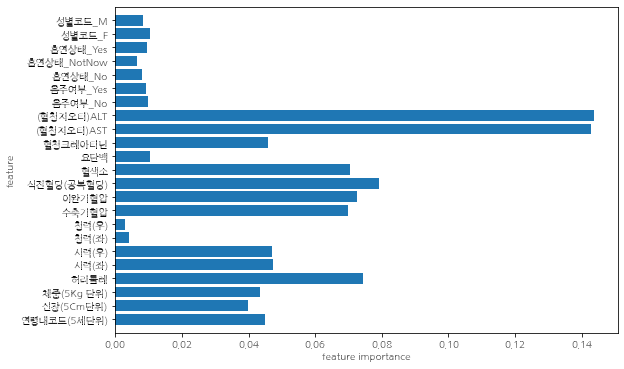

In [73]:
fm._rebuild()
plot_feature_importances_health(forest)

## **그래디언트 부스팅**

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [75]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.867
시험용 데이터 세트 정확도: 0.849


In [76]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)  
    n_features = len(health_T1.columns[0:23])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), health_T1.columns[0:23])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

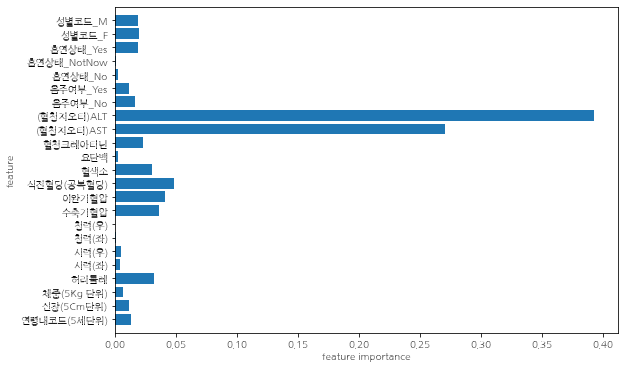

In [77]:
fm._rebuild()
plot_feature_importances_health(gbrt)

gbrt의 성능을 더 높일 수 있는지 확인하기 위해, grid search를 통해 파라미터 순차적으로 변경하며 최적화 수행

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[3,4,5], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [79]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, refit=True)

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [3, 4, 5]})

In [80]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

#기본값이 가장 좋은 결과를 냈음을 확인했다.

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.8480


## **최적의 분류모델 선택 feat 교차검증 **

In [81]:
# 랜덤포레스트 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

randomforest_eval = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Decision tree :{:.3f}".format(randomforest_eval.mean())) 

Accuracy mean
Decision tree :0.839


In [82]:
# 그래디언트부스팅 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

gbrt_eval = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Gradient boosting :{:.3f}".format(gbrt_eval.mean())) 

Accuracy mean
Gradient boosting :0.848


=> 그래디언트 부스팅이 더 정확함을 확인하여, 이 모델을 채택 

##  + 모델 평가 feat. 정오 분류표 

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

rf_predict = forest.predict(X_test)
gbrt_predict = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_predict)))
print(confusion_matrix(y_test, rf_predict))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_predict)))
print(confusion_matrix(y_test, gbrt_predict))

정상     2064
비정상     436
Name: 감마지티피 상태, dtype: int64
Random forest 시험용 데이터 세트 정확도:0.834
[[ 127  309]
 [ 105 1959]]
Gradient boosting 시험용 데이터 세트 정확도:0.849
[[ 124  312]
 [  66 1998]]


# 3. 선택된 분류모델을 통한 인사이트 도출

상대적으로 더 우수하게 분류해내는 '그래디언트 부스팅' 모델의 결과를 분석하고 이를통해 인사이트를 도출해내고자한다.

우선, 감마지티피 상태가 정상인지 비정상인지 분류해내는것에 있어서 (혈청지오티)ALT와 (혈청지오티)AST가 매우 큰 영향을 미치는 변수임을 확인했다.

그 뒤를 이어 식전혈당(공복혈당),이완기혈압, 허리둘레, 수축기혈압, 혈색소 등이 분류에 있어서 제법 큰 영향을 미침을 확인했다.

반대로 청력, 시력, 체중, 요단백, 흡연상태 등은 해당 의사결정 나무에서 분류에 큰 영향을 미치지 않았음을 확인했다.

감마지티피란, 간 기능을 나타내는 수치이다. 따라서 이것이 '정상'상태라는 것은 간의 기능이 정상적으로 이행되고 있음을 의미하는 것이다. 'ALT'와 'AST' 역시 간에 대한 수치를 의미하므로, 이 두 변수가 감마지티피의 정상/비정상 상태를 분류해는데 큰 영향을 주었음을 알 수 있었다.

즉 다시말해, AST와 ALT의 수치 상태가 정상적이라면, 감마지티피 역시 정상치 기준에 속할 확률이 높아진다는 것이다.

이어서 식전혈당(공복혈당)도 어느정도 중요하게 작용했음을 확인했는데, 이는 간 기능의 상태와 식전혈당이 관계성이 있음을 의미한다. 실제로 의학계에서는 '공복혈당'이 높다면, 간의 기능 중 '혈당 조절'에 문제가 있다는 판단을 하게 된다. 이를 통해 식전혈당이 중요한 변수로 작용한 것이 적합했다고 확인할 수 있었다.


이완기혈압과 수축기혈압, 즉 혈압의 경우에도 감마지티피의 정상 비정상 상태를 분류해내는데 있어서 중요한 변수로 작용했는데, 이는 혈압과 간 기능이 밀접한 관계가 있음을 암시한다. 실제로 간 기능이 저하되면, 혈관이 수축할 수 있고, 좋지 않은 지방이 혈관에 축적될 수도 있다. 이를 통해 혈압 또한, 중요한 변수로 작용한 것이 적합했다는 사실을 확인했다.

결과적으로, 해당 모델이 감마지티피의 정상 비정상 여부를 분류하는데 있어서 적절한 변수를 택하여 분류를 진행했다는 사실을 알 수 있었다.
